# **Titanic Survival Classifier**

### Importing all required libraries

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

S:\anaconda3\lib\site-packages\ipykernel\parentpoller.py:113: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  warnings.warn("""Parent poll failed.  If the frontend dies,


### Store the datasets into Pandas dataframes

In [2]:
# Importing the datasets into dataframes
train_org_df = pd.read_csv('datasets/train.csv')
test_org_df = pd.read_csv('datasets/test.csv')
train_org_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
test_org_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


### Overall Plan

* Combine the training and testing datasets
* Get a summary on all the features
* Display the distributions of the features
* Display the correlations between different features
* Deal with null values
* Perform transformations on the distributions
* Clean and preprocess the values of each feature
* Create, extract or combine features as appropriate
* Encode the categorical features
* Choose a model
* Train the model and output the results

### Combining the datasets

In [4]:
# Get a copy of the datasets
train_df = train_org_df.copy()
test_df = test_org_df.copy()

# Add a 'Source' column to the datasets
train_df['Source'] = 'train'
test_df['Source'] = 'test'

# Combine the two datasets to maintain consistency when cleaning and preprocessing
titanic_df = train_df.append(test_df)
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Source
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,test
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test


In [5]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Source       1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


### Summary of the data

* Total number of observations = 1309
* Total number of features = 13
* Three unique datatypes: float, int and object
* Mean age for passengers = 29.88
* Mean for survival rate = 0.38
* Mean fare price = 33.295

### Dealing with null values

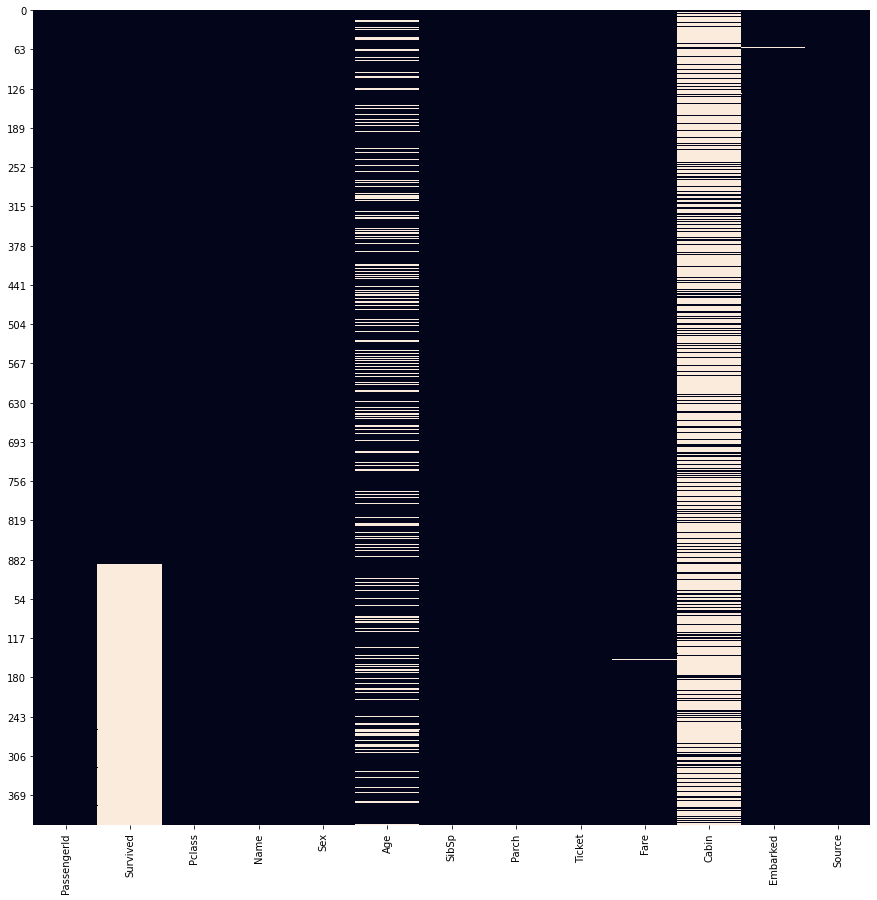

In [7]:
# Using a heatmap to observe the density of null values across all features
null_heatmap = sns.heatmap(titanic_df.isnull(), cbar=False)
null_heatmap.figure.set_size_inches(15, 15)

Missing values in 'Survived' is due to the testing portion of the dataset not having the target feature. Otherwise, 'Age' and 'Cabin' have the highest number of missing values. 'Fare' and 'Embarked' have some missing values.

In [8]:
# Display exact number of null entries in each feature
null_features = titanic_df.isnull().sum()
for key, value in null_features.iteritems():
    print("{:15s} {}".format(key, value))

PassengerId     0
Survived        418
Pclass          0
Name            0
Sex             0
Age             263
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           1014
Embarked        2
Source          0


'Age' is a quantitative feature and it is an important feature, so I will replace the null values in this feature with the mean value. The other null values will also be filled in with either the mean or mode.

In [9]:
# Replace the null values in age with the mean value
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

# Fill in null values for the other features
titanic_df['Fare'].fillna(titanic_df['Fare'].mean(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

In [10]:
titanic_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

With so many unique classes, I can't fill the null values in 'Cabin' with the mode. Instead, having "null" Cabin could mean that the passenger wasn't assigned a cabin, and not that the values weren't recorded or is missing. Therefore, passengers with "null" Cabin will be assigned with "No Cabin".

In [11]:
# Fill in null values in 'Cabin'
titanic_df['Cabin'].fillna("No Cabin", inplace=True)

In [12]:
# Check if all null values are filled
null_features = titanic_df.isnull().sum()
for key, value in null_features.iteritems():
    print("{:15s} {}".format(key, value))
    
# Display the modified dataset
titanic_df.head(10)

PassengerId     0
Survived        418
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
Source          0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Source
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No Cabin,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No Cabin,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No Cabin,S,train
5,6,0.0,3,"Moran, Mr. James",male,29.881138,0,0,330877,8.4583,No Cabin,Q,train
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,train
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,No Cabin,S,train
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,No Cabin,S,train
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,No Cabin,C,train


### Exploratory Data Analysis

Firstly, I will use a heatmap to observe the correlations between the features. Then, bar graphs, histograms and pivot tables will be used to display the correlation and distributions between and of the different features.

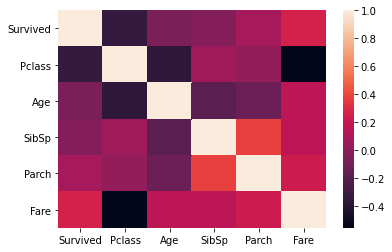

In [13]:
# Retrieve all the quantitative features in the dataset
corr_features = titanic_df.select_dtypes(include=['float64', 'int64']).drop('PassengerId', axis=1)

# Heatmap to show correlations between the features
sns.heatmap(corr_features.corr());

From the above graph, there are a few important points to mention. Firstly, PClass and Survived have a largely negative correlation. This means that an increased in PClass value (lower passenger classes) corresponds to a decrease in survival rate. Secondly, PClass also have a negative correlation with Age and Fare. That means passengers with lower PClass values (higher passenger classes) are older and pays more for their tickets. Lastly, SibSp and Parch have a very high correlation because if a passenger was bringing family (siblings or spouses), they are equally likely to bring their parents and children, and vice versa.

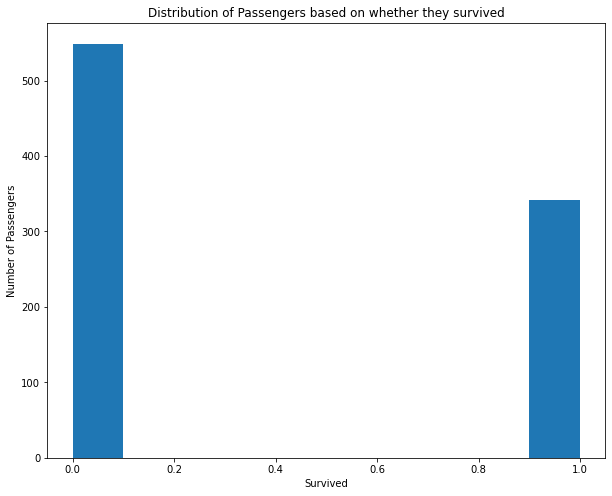

In [14]:
plt.figure(figsize=(10, 8))
plt.hist(titanic_df['Survived'])
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.title('Distribution of Passengers based on whether they survived')
plt.show()

The number of people that died looks to be nearly doubled the number of people that survived. This means that the majority of people died in the disaster.

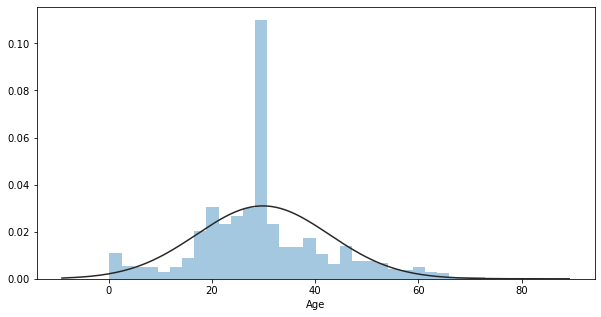

In [15]:
age_dist = sns.distplot(titanic_df['Age'], fit=st.norm, kde=False);
age_dist.figure.set_size_inches(10, 5)

The age of passengers follows an almost normal distribution, though, it is very slightly right-skewed. Most people aboard the ship are young to late middle age. More elderly people are uncommon.

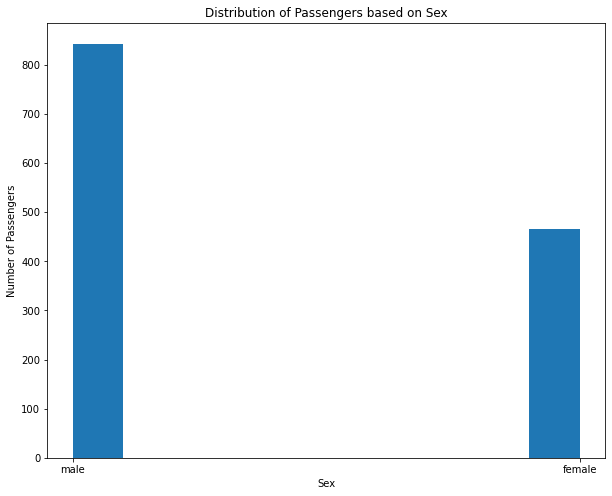

In [16]:
plt.figure(figsize=(10, 8))
plt.hist(titanic_df['Sex'])
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.title('Distribution of Passengers based on Sex')
plt.show()

The number of male passengers almost doubled the number of female passengers on board.

In [17]:
# Pivot table to compare the survival rate between passengers of different Age, SibSp, Parch, Fare and PClass
pd.pivot_table(titanic_df, index='Survived', values=['Age', 'SibSp', 'Parch', 'Fare', 'Pclass'])

,Age,Fare,Parch,Pclass,SibSp
Survived,,,,,
0.0,30.456543,22.117887,0.329690,2.531876,0.553734
1.0,28.577454,48.395408,0.464912,1.950292,0.473684


The pivot table shows that on average, a slightly higher number of younger people survivied compared to the number of older people. People who paid more for their fares also survived more often compared to those who paid less. Having more parents or children also increased survival rate. However, having more siblings or spouses decreased survival rate. Lastly, people in higher classes have a significantly higher surival rate compared to those in lower classes.

In [18]:
# Pivot table to observe any correlation between sexes and the survival rate
pd.pivot_table(titanic_df, index='Sex', values=['Survived'])

,Survived
Sex,
female,0.742038
male,0.188908


I had a hypothesis, mostly based on my knowledge of the actual event, that females and children were given first priorities during the evacuation. This hypothesis is accurate, as the survival rates for females are much higher than that of males as seen in the pivot table.

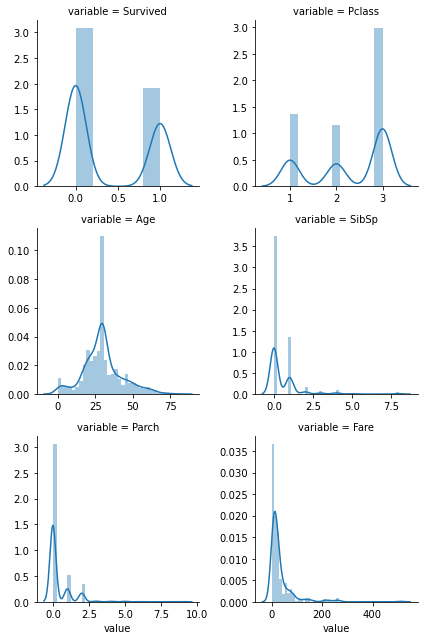

In [19]:
# Analyze the distributions of all quantitative features
quantitative_features_df = pd.melt(titanic_df, value_vars=titanic_df.select_dtypes(include=['float64', 'int64']).drop('PassengerId', axis=1))

# Create a facet grid to display all distributions of all quantitative features
facet_grid = sns.FacetGrid(quantitative_features_df, col="variable", col_wrap=2, sharex=False, sharey=False)
facet_grid = facet_grid.map(sns.distplot, "value")

The Facet Grid shows that SibSp, Parch and Fare are all right skewed. Therefore, Log Transformation will be applied to these features to convert them into normal distributions.

### Data Cleaning, Preprocessing and Feature Engineering

In [20]:
# Function that performs log transformation on a feature
def log_transform(column):
    titanic_df[column] = titanic_df[column].apply(lambda x: np.log1p(x) if x > 0 else x)

In [21]:
# Transform distributions of these features into normal distributions
log_transform('Fare')

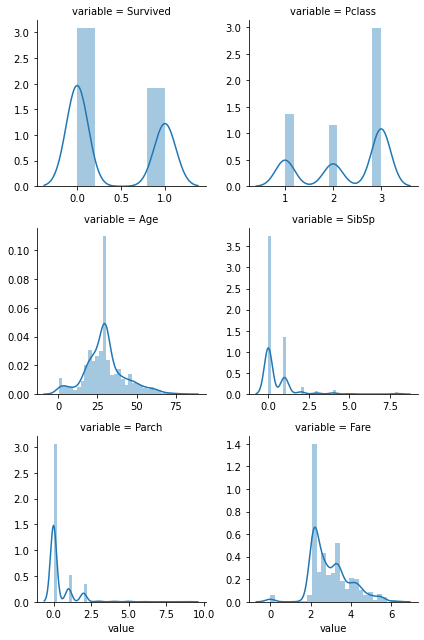

In [22]:
# Re-display the distributions
quantitative_features_df = pd.melt(titanic_df, value_vars=titanic_df.select_dtypes(include=['float64', 'int64']).drop('PassengerId', axis=1))

facet_grid = sns.FacetGrid(quantitative_features_df, col="variable", col_wrap=2, sharex=False, sharey=False)
facet_grid = facet_grid.map(sns.distplot, "value")

From the data, I have a suspicion that the passengers' titles (Mr., Ms., etc.) might have some correlations with their survival rate. Therefore, I will extract the titles from each passenger's name and plot a pivot table.

In [23]:
# Extract the titles from each passenger's name and create a new feature from these values
titanic_df['Title'] = titanic_df['Name'].apply(lambda x: x.split(",")[1].split(".")[0].strip())
titanic_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [24]:
titanic_df['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Major             2
Ms                2
Mlle              2
Capt              1
Don               1
Lady              1
Mme               1
Jonkheer          1
Sir               1
the Countess      1
Dona              1
Name: Title, dtype: int64

A lot of the newly extracted titles have very small frequencies. Therefore, I will assign these rare categorical classes as 'Other'.

In [25]:
# Assign rare categorical classses as 'Other'
common_title = ['Mr', 'Miss', 'Mrs', 'Master']
titanic_df['Title'] = titanic_df['Title'].apply(lambda x: 'Other' if x not in common_title else x)
titanic_df['Title'].value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
Other      34
Name: Title, dtype: int64

In [26]:
# Pivot table to observe any correlation between the titles and the survival rate
pd.pivot_table(titanic_df, index='Title', values=['Survived'])

,Survived
Title,
Master,0.575000
Miss,0.697802
Mr,0.156673
Mrs,0.792000
Other,0.444444


I can observe that Mrs and Miss have the highest survival rates. This is inline with my hypothesis that females have higher survival rates compared to males. Master also have a decent survival rate, probably because older people were also given priority during the evacuation. Younger men with Mr as their titles have the lowest survival rates.

In [27]:
# Extract the first character of each cabin number, the section each cabin belongs to, and create a new feature based on these values
titanic_df['CabinSection'] = titanic_df['Cabin'].apply(lambda x: x[:1].strip() if x != "No Cabin" else x)
titanic_df['CabinSection'].value_counts()

No Cabin    1014
C             94
B             65
D             46
E             41
A             22
F             21
G              5
T              1
Name: CabinSection, dtype: int64

In [28]:
# Pivot table to observe any correlation between the cabin sections and the survival rate
pd.pivot_table(titanic_df, index='CabinSection', values=['Survived']).sort_values('Survived', ascending=False)

,Survived
CabinSection,
D,0.757576
E,0.750000
B,0.744681
F,0.615385
C,0.593220
G,0.500000
A,0.466667
No Cabin,0.299854
T,0.000000


From the pivot table, cabins in some sections have a much higher rate of survival compared to cabins in other sections. This could be because the cabins, grouped into different sections, would be located in different parts of the ship. Thus, some sections might have a shorter and less dangerous route to safety compared to others. Additionally, passengers of the same class might be assigned to cabins in the same section as one another. Therefore, there could also be a correlation between the cabin section and the Pclass. Lastly, passengers with no cabins have the lowest survival rate, likely because they are also from the lower classes and couldn't affort or have not been given a cabin. The survival rate for the T cabin section is most likely inaccurate due to only having a small number of passengers living in it.

In [29]:
titanic_df['Embarked'].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

Most passengers boarded the ship from Southampton, which is most likely where the ship initially departed.

In [30]:
# Pivot table to observe any correlation between the ports of embarkation and the survival rate
pd.pivot_table(titanic_df, index='Embarked', values=['Survived']).sort_values('Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


This is a very interesting finding. I initially thought that passengers embarking from Southampton might have a disproportionately high survival rate because the large majority of passengers embarked from there. However, their survival rate is relatively equal to those embarking from Queenstown. Whereas passengers embarking from Cherbourg have the highest survival rate. This could mean that passengers from Cherbourg might be of higher classes or been assigned a cabin in the sections with higher survival rates.

Now, I will perform One Hot Encoding on the categorical features and remove any duplicated columns within the dataset.

In [31]:
# Retrieve categorical features to be encoded within the dataset
categorical_features = titanic_df.select_dtypes(include=['object']).drop(['Name', 'Source'], axis=1).columns

# Perform dummy encoding on these categorical features
titanic_df = pd.get_dummies(data=titanic_df, columns=categorical_features)

# Remove all duplicated columns
titanic_df = titanic_df.loc[:, ~titanic_df.columns.duplicated()]
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Source,Sex_female,...,Title_Other,CabinSection_A,CabinSection_B,CabinSection_C,CabinSection_D,CabinSection_E,CabinSection_F,CabinSection_G,CabinSection_No Cabin,CabinSection_T
0,1,0.0,3,"Braund, Mr. Owen Harris",22.000000,1,0,2.110213,train,0,...,0,0,0,0,0,0,0,0,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,4.280593,train,1,...,0,0,0,1,0,0,0,0,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",26.000000,0,0,2.188856,train,1,...,0,0,0,0,0,0,0,0,1,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,3.990834,train,1,...,0,0,0,1,0,0,0,0,0,0
4,5,0.0,3,"Allen, Mr. William Henry",35.000000,0,0,2.202765,train,0,...,0,0,0,0,0,0,0,0,1,0
5,6,0.0,3,"Moran, Mr. James",29.881138,0,0,2.246893,train,0,...,0,0,0,0,0,0,0,0,1,0
6,7,0.0,1,"McCarthy, Mr. Timothy J",54.000000,0,0,3.967694,train,0,...,0,0,0,0,0,1,0,0,0,0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",2.000000,3,1,3.094446,train,0,...,0,0,0,0,0,0,0,0,1,0
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.000000,0,2,2.495954,train,1,...,0,0,0,0,0,0,0,0,1,0
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.000000,1,0,3.436268,train,1,...,0,0,0,0,0,0,0,0,1,0


Before, modelling, I will split the dataset back into a training and testing dataset. I will also save these processed datasets in case of future uses.

In [32]:
# Split the dataset back into a training and testing dataset
train_preprocessed = pd.DataFrame(titanic_df[titanic_df['Source'] == 'train'])
test_preprocessed = pd.DataFrame(titanic_df[titanic_df['Source'] == 'test'])

# Drop unecessary features
train_preprocessed = train_preprocessed.drop(['PassengerId', 'Name', 'Source'], axis=1)
test_preprocessed = test_preprocessed.drop(['Name', 'Source', 'Survived'], axis=1)

In [33]:
# Export and save the preprocessed datasets as csv files
train_preprocessed.to_csv(r'datasets/train_preprocessed.csv')
test_preprocessed.to_csv(r'datasets/test_preprocessed')

### Modelling

Splitting the training dataset into independent and dependent variables. Then normalize the data before putting it into a model for training.

In [34]:
X = train_preprocessed.drop('Survived', axis=1)
y = train_preprocessed['Survived']

# Normalize the training and testing dataset
scaler = StandardScaler()
scaler.fit_transform(X)
scaler.fit_transform(test_preprocessed)

array([[-1.72791209,  0.87348191,  0.34134784, ..., -0.04897021,
         0.52752958,  0.        ],
       [-1.71962474,  0.87348191,  1.33180741, ..., -0.04897021,
         0.52752958,  0.        ],
       [-1.71133739, -0.31581919,  2.52035889, ..., -0.04897021,
         0.52752958,  0.        ],
       ...,
       [ 1.71133739,  0.87348191,  0.65829491, ..., -0.04897021,
         0.52752958,  0.        ],
       [ 1.71962474,  0.87348191, -0.02463587, ..., -0.04897021,
         0.52752958,  0.        ],
       [ 1.72791209,  0.87348191, -0.02463587, ..., -0.04897021,
         0.52752958,  0.        ]])

In [35]:
# Create the Logistic Regression model
regressor = LogisticRegression(random_state=0, max_iter=1000)

# Train the model
regressor.fit(X, y)

# Output the predictions
y_hat = regressor.predict(test_preprocessed.drop('PassengerId', axis=1)).astype(int)
y_hat

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [36]:
# Create the submission file
submission = pd.DataFrame({'PassengerId': test_preprocessed['PassengerId'], 'Survived': y_hat})
submission.to_csv('titanic_survival_classifier.csv', index=False)